# Lab 11 Classification and Predictive Analytics - [25 points]


## <u>Case Study</u>: Creating an Accurate Classifier Model of Fake and Real Instagram Accounts

We will revisit the fake_insta_cleaned.csv dataset with a different research goal in mind now. In Lab 10, we were more interested in **understanding the relationships** between the explanatory variables and the response variable (fake vs. real) in the **population of fake and real Instagram accounts**.

*Now*, we are interested in building a classifier model that gives the most accurate predictions of the observations of the dataset.

We will build a logistic regression model that predicts the probability that an account is fake, using the following explanatory variables.
* the number of accounts someone *follows*
* number of *followers*
* number of posts
* number of words in name
* number of characters in the bio
* whether they have a profile picture or not




## Imports

In [9]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score

## 1. Data Preliminaries
### 1.1 [0.5 pt] Read the fake_insta_cleaned.csv into a dataframe called df.

In [3]:
df = pd.read_csv("fake_insta_cleaned.csv")

In [4]:
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real


### 1.2. [0.5 pt] Next, create a new variable y in df that is equal to 1 when the the account is fake and that is equal to 0 when the account is real.

In [5]:
df['y']=df['account_type'].map({'real':0,'fake':1})
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y
0,yes,1,30,35,488,604,real,0
1,yes,5,64,3,35,6,real,0
2,yes,2,82,319,328,668,real,0
3,yes,1,76,6,225,356,real,0
4,yes,1,0,6,362,424,real,0


## 2. <u>Logistic Regression Model 1</u>


### 2.1. [1 pt] Fit a logistic regression model with y and the following explanatory variables:
* the number of accounts someone *follows*
* number of *followers*
* number of posts
* number of words in name
* number of characters in the bio
* whether they have a profile picture or not

In [6]:
results1 = smf.logit(formula='y ~ number_of_follows+number_of_followers+number_of_posts+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=df).fit()
results1.summary()

         Current function value: 0.125651
         Iterations: 35


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.8186
Time:                        13:01:27   Log-Likelihood:                -14.073
converged:                      False   LL-Null:                       -77.561
Covariance Type:            nonrobust   LLR p-value:                 5.565e-25
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   84.9623     45.105      1.884      0.060      -3.443     173.367
has_a_profile_pic[T.yes]   -80.5107     44.506     -1.809      0.070    -167.742       6.720
number_of_follows            0.0091      0.003      3.332      0.001       0.004       0.014
number_of_followers         -0.0279      0.009     -3.176      0.001      -0.045      -0.011
number_of_posts             -0.0016      0.013     -0.121      0.904      -0.027       0.024
number_of_words_in_name     -1.1742      0.559     -2.102      0.036      -2.269      -0.080
num_characters_in_bio       -0.1083      0.047     -2.311      0.021      -0.200      -0.016
============================================================================================

Possibly complete quasi-separation: A fraction 0.48 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 2.2  [1 pt] Which (if any) of the slopes in the logistic regression population model do we have sufficient evidence to suggest are non-zero? Use a signifiance level of $\alpha=0.05$. Explain your answers.

The number_of_followers, number_of_follows, number_of_words_in_name, num_characters_in_bio all have p-value of slopes less than 0.05. Therefore, we have convicing evidence for all of these variables that the slopes are non-zero. 

## 3. <u>Logistic Regression Model 2</u>
### 3.1.  [1 pt] Now, fit another logistic regression model, using only the explanatory variables that you selected in 2.2.

In [7]:
results2 = smf.logit(formula='y ~ number_of_follows+number_of_followers+number_of_words_in_name+num_characters_in_bio', data=df).fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.400375
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.4218
Time:                        13:01:38   Log-Likelihood:                -44.842
converged:                       True   LL-Null:                       -77.561
Covariance Type:            nonrobust   LLR p-value:                 2.081e-13
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.9815      0.583      3.397      0.001       0.838       3.125
number_of_follows           0.0014      0.000      2.838      0.005       0.000       0.002
number_of_followers        -0.0018      0.001     -2.027      0.043      -0.004   -6.07e-05
number_of_words_in_name    -0.7723      0.354     -2.185      0.029      -1.465      -0.079
num_characters_in_bio      -0.0622      0.018     -3.477      0.001      -0.097      -0.027
===========================================================================================
"""

### 3.2.  [1 pt] Which (if any) of the slopes in this new logistic regression population model do we have sufficient evidence to suggest are non-zero? Use a signifiance level of $\alpha=0.05$. Explain your answers.

All variables in this logistic regression population model have a non-zero slope because all of the p-values of these slopes are less than 0.05.

## 4. ROC and AUC Curve Comparison

In #2 and #3 we created two logistic regression models (model 1 and model 2, respectively). First, we would like to select which of these two logistic regression models will be more accurate when classifying the accounts in this dataset as fake or real.

### 4.1.  [1.5 pt] Plot the ROC curve and calculate the AUC for model 1.

In [11]:
fprs, tprs, threshold = roc_curve(y_true=df['y'], y_score=results1.fittedvalues)
auc = roc_auc_score(y_true=df['y'], y_score=results1.fittedvalues)
print(auc)

0.9920178799489144


In [12]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr,tpr, color='darkorange', lw=lw, label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positivity Rate')
    plt.ylabel('True Positivity Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

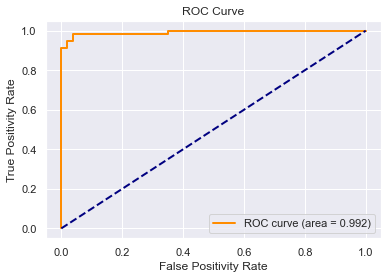

In [13]:
plot_roc(fprs, tprs, auc)

### 4.2.  [1.5 pt] Plot the ROC curve and calculate the AUC for model 2.

In [14]:
fprs, tprs, threshold = roc_curve(y_true=df['y'], y_score=results2.fittedvalues)
auc = roc_auc_score(y_true=df['y'], y_score=results2.fittedvalues)
print(auc)

0.9169859514687101


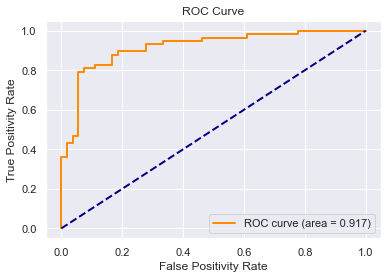

In [15]:
plot_roc(fprs, tprs, auc)

easter egg!

### 4.3.  [1 pt] If we could build an "ideal" classifier with this dataset, what would we want the false positive rate and the true positive rate of our classifications to be?

We would want out true positive rate to be very very high (close to 1) and false positive rate very small (close to 0)

### 4.4.  [1 pt] Which of these two logistic regression models is more likely to have a predictive probability threshold that is closer to this "ideal" false positive rate and true positive rate? Explain.

Model 1 is closer to the ideal false positive and true positive rate because it seems to "hug" the left and top sides of the graph. This means that the false positive value is very low while the true positive rate is very high.  Model 2 is decent, but Model 1 hugs the sides better. 


## 5. Making Classifications with Model 1 and a Predictive Probability Threshold of $p_0=0.9$.

Next, for now, let's choose to use logistic regression model 1 and a predictive probability threshold of $p_0=0.9$.

### 5.1.  [1 pt] Use this threshold to classify all of the accounts in the dataset as fake (ie. 1) or real (ie. 0). Add these predictions as a column in your dataframe.

In [17]:
pred_probabilities=results1.predict(exog=dict(df))
df['predictive_prob']=pred_probabilities
df

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y,predictive_prob
0,yes,1,30,35,488,604,real,0,0.000296
1,yes,5,64,3,35,6,real,0,0.000094
2,yes,2,82,319,328,668,real,0,0.000032
3,yes,1,76,6,225,356,real,0,0.000338
4,yes,1,0,6,362,424,real,0,0.049266
...,...,...,...,...,...,...,...,...,...
107,yes,1,0,13,114,811,fake,1,0.999421
108,yes,1,0,4,150,164,fake,1,0.642049
109,yes,2,0,3,833,3572,fake,1,0.999988
110,no,1,0,1,219,1695,fake,1,1.000000


In [18]:
df['yhat']=1*(df['predictive_prob']>0.9)
df

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y,predictive_prob,yhat
0,yes,1,30,35,488,604,real,0,0.000296,0
1,yes,5,64,3,35,6,real,0,0.000094,0
2,yes,2,82,319,328,668,real,0,0.000032,0
3,yes,1,76,6,225,356,real,0,0.000338,0
4,yes,1,0,6,362,424,real,0,0.049266,0
...,...,...,...,...,...,...,...,...,...,...
107,yes,1,0,13,114,811,fake,1,0.999421,1
108,yes,1,0,4,150,164,fake,1,0.642049,0
109,yes,2,0,3,833,3572,fake,1,0.999988,1
110,no,1,0,1,219,1695,fake,1,1.000000,1


### 5.2.  [1.5 pt] What is the number of true positives, true negatives, false positives, and false negatives of this classification?

In [19]:
confusion_matrix(y_true=df['y'],y_pred=df['yhat'])
tn, fp, fn, tp = confusion_matrix(y_true=df['y'], y_pred=df['yhat']).ravel()
(tn, fp, fn, tp)

(54, 0, 11, 47)

True Negatives: 54
False Positives: 0
False Negatives: 11
True Positives: 47

### 5.3.  [1.5pt] What does a true positive, true negative, false positive, and false negative mean in the context of this problem? Ie. put these definitions into words in the context of this problem.

True Negative: Correctly identifiying that an instagram account is not real when it truly is fake.
False Positives: Incorrectly identifying that an instagram account is real when it is truly fake.
False Negatives: Incorrectly identifying that an instagram account is fake when it is truly real.
True Positives: Correctly identifying that a real instagram account is truly real.

### 5.4.  [1 pt] Calculate the sensitivity for this classification.

In [20]:
sensitivity=tp/(tp+fn)
print("Sensitivity: ", sensitivity)

Sensitivity:  0.8103448275862069


### 5.5.  [1 pt] Calculate the true positive rate for this classification.

In [23]:
true_positive_rate=tp/(fn+tp)
print("True Positive Rate: ", true_positive_rate)

True Positive Rate:  0.8103448275862069


### 5.6.  [1 pt] Calculate the specificity for this classification.

In [21]:
specificity=tn/(tn+fp)
print("Specificity: ", specificity)

Specificity:  1.0


### 5.7.  [1 pt] Finally, calculate the false positive rate for this classification.

In [22]:
false_positive_rate=fp/(tn+fp)
print("False Positive Rate: ", false_positive_rate)

False Positive Rate:  0.0


## 6. Making Classifications with Model 1 and a Predictive Probability Threshold of $p_0=0.1$.

Next, let's choose to use logistic regression model 1 and a predictive probability threshold of $p_0=0.1$.

### 6.1.  [1 pt] Use this threshold to classify all of the accounts in the dataset as fake (ie. 1) or real (ie. 0). Add these predictions as a column in your dataframe.

In [24]:
df['yhat']=1*(df['predictive_prob']>0.1)
df

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y,predictive_prob,yhat
0,yes,1,30,35,488,604,real,0,0.000296,0
1,yes,5,64,3,35,6,real,0,0.000094,0
2,yes,2,82,319,328,668,real,0,0.000032,0
3,yes,1,76,6,225,356,real,0,0.000338,0
4,yes,1,0,6,362,424,real,0,0.049266,0
...,...,...,...,...,...,...,...,...,...,...
107,yes,1,0,13,114,811,fake,1,0.999421,1
108,yes,1,0,4,150,164,fake,1,0.642049,1
109,yes,2,0,3,833,3572,fake,1,0.999988,1
110,no,1,0,1,219,1695,fake,1,1.000000,1


### 6.2.  [1 pt] What is the false positive rate and the true positive rate of these classifications?

In [25]:
confusion_matrix(y_true=df['y'],y_pred=df['yhat'])
tn, fp, fn, tp = confusion_matrix(y_true=df['y'], y_pred=df['yhat']).ravel()
(tn, fp, fn, tp)

(45, 9, 1, 57)

In [26]:
false_positive_rate=fp/(tn+fp)
print("False Positive Rate: ", false_positive_rate)

False Positive Rate:  0.16666666666666666


In [27]:
true_positive_rate=tp/(fn+tp)
print("True Positive Rate: ", true_positive_rate)

True Positive Rate:  0.9827586206896551


## 7.  [2 pt] Suggesting a Classifier to a Client

Suppose you are a data scientist that works at Instagram and you have two clients with different goals.

* <u>Client 1</u>: This client is an aspiring Instagram influencer that cares very much about *only* following real accounts. If the classifier classifies an account as fake, this client will not follow that account. Therefore they would like to be able to identify fake accounts as accurately as possible. However, it is not a big deal if the classifier inaccurately classifies a real account as fake.

* <u>Client 2</u>: "Client 2" is actually your boss at Instagram, and they tell you to delete all accounts that your classifier model thinks are fake. However, there is a huge penalty for deleting an account that is actually real.


### Which client would you choose to recommend predictive probability threshold $p_0=0.9$ to? Which client would you choose to recommend predictive probability threshold $p_0=0.1$ to? Explain.

I would recommend client 1 to use the 0.9 threshold because the false positivity rate is 0. This means that the rate at which we identify a fake instagram account as real is 0, so they would be satified. On the other hand, Client 2 would use the threshold of 0.1 because the false negative rate is super low, so the odds of deleting an account that is real is super low. 

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## <u>Tutorial</u>: Iterating Through a Range of Values with a Step Size

The numpy function **arange(lower_bound, upper_bound, step_size)** produces an array of numbers in which:
* lower_bound: is the first number in the array
* upper_bound-step_size: is the last number in the array
* step_size: is the step size interval in the array.

For instance the code below creates an array going from 0 to 9.5 with a step size of 0.5.

In [30]:
import numpy as np
for i in np.arange(0,10,.5):
    print(i)

0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## 8. Choosing the Predictive Probability Threshold we Want

### 8.1.  [2 pt] With logistic regression model 1, calculate the corresponding false positive rate and the true positive rate for each of the predictive probability thresholds of $p_0=0,  p_0=0.01, p_0=0.02, p_0=0.03,...,p_0=1$.

You will need a for-loop!

In [33]:
for i in np.arange(0, 1, 0.01):
    df['yhat']=1*(df['predictive_prob']>i)
    confusion_matrix(y_true=df['y'],y_pred=df['yhat'])
    tn, fp, fn, tp = confusion_matrix(y_true=df['y'], y_pred=df['yhat']).ravel()
    false_positive_rate=fp/(tn+fp)
    print("At p(0) = ", i)
    print("False Positive Rate: ", false_positive_rate)
    true_positive_rate=tp/(fn+tp)
    print("True Positive Rate: ", true_positive_rate)
    print("\n")

At p(0) =  0.0
False Positive Rate:  1.0
True Positive Rate:  1.0


At p(0) =  0.01
False Positive Rate:  0.3333333333333333
True Positive Rate:  0.9827586206896551


At p(0) =  0.02
False Positive Rate:  0.3148148148148148
True Positive Rate:  0.9827586206896551


At p(0) =  0.03
False Positive Rate:  0.3148148148148148
True Positive Rate:  0.9827586206896551


At p(0) =  0.04
False Positive Rate:  0.25925925925925924
True Positive Rate:  0.9827586206896551


At p(0) =  0.05
False Positive Rate:  0.2222222222222222
True Positive Rate:  0.9827586206896551


At p(0) =  0.06
False Positive Rate:  0.2222222222222222
True Positive Rate:  0.9827586206896551


At p(0) =  0.07
False Positive Rate:  0.18518518518518517
True Positive Rate:  0.9827586206896551


At p(0) =  0.08
False Positive Rate:  0.18518518518518517
True Positive Rate:  0.9827586206896551


At p(0) =  0.09
False Positive Rate:  0.16666666666666666
True Positive Rate:  0.9827586206896551


At p(0) =  0.1
False Positive Rate:  

At p(0) =  0.97
False Positive Rate:  0.0
True Positive Rate:  0.7068965517241379


At p(0) =  0.98
False Positive Rate:  0.0
True Positive Rate:  0.6896551724137931


At p(0) =  0.99
False Positive Rate:  0.0
True Positive Rate:  0.6379310344827587




### 8.2.  [1 pt] Which predictive probability threshold $p_0$ will give us the largest true positive rate with a false positive rate that is 0?

At p(0) = 0.79